## 2. Write a program to demonstrate the SVM model by using appropriate  training data set and find the accuracy of the model.


##SVM deals with regression and classification model
##Here we are taking the data of patients possibly suffering from tumour 

## done by Aachal Singh 18BTRCS106 , Pratik Shrestha 18BTRCS067

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cell_samples.csv')

In [3]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [5]:
bengin_data = data[data['Class']==2]
malignant_data = data[data['Class']==4]    #there are two sets of data for comparison

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

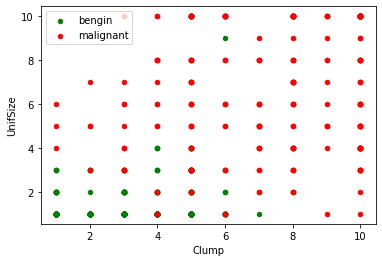

In [6]:
a = bengin_data.plot(kind='scatter', x ='Clump' , y= 'UnifSize' , label = 'bengin' , color = 'g')
malignant_data.plot(kind='scatter', x ='Clump' , y= 'UnifSize' , color = 'r' , label = 'malignant', ax=a)


## above are the comparison between two tumour cells 1. bengin and 2.malignant

In [7]:
data_model = data[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BlandChrom','NormNucl','Mit']]

## now setting model for training and for testing purpose

In [8]:
X = np.asarray(data_model)
y = np.asarray(data['Class'])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [16]:
X_train.shape

(559, 8)

In [17]:
y_test.shape

(140,)

In [22]:
from sklearn import svm
classifier = svm.SVC(kernel='linear' , gamma='auto' , C=2)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

## using linear kernel model for dataset



In [23]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           2       0.95      0.99      0.97        88\n           4       0.98      0.90      0.94        52\n\n    accuracy                           0.96       140\n   macro avg       0.96      0.95      0.95       140\nweighted avg       0.96      0.96      0.96       140\n'

In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        88
           4       0.98      0.90      0.94        52

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



## Hence the accuracy using linear method

In [25]:

from sklearn import svm
classifier = svm.SVC(kernel='rbf' , gamma='auto' , C=2)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           2       0.97      0.98      0.97        88\n           4       0.96      0.94      0.95        52\n\n    accuracy                           0.96       140\n   macro avg       0.96      0.96      0.96       140\nweighted avg       0.96      0.96      0.96       140\n'

In [27]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           2       0.97      0.98      0.97        88
           4       0.96      0.94      0.95        52

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



## Hence the accuracy using radial bias function (rbf)